### Sharks!

Ichthyology 

![sharks](http://echeng.com/journal/images/misc/061006_113519_echeng6553.jpg)

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sb
from ggplot import *
%matplotlib inline

In [2]:
df = pd.read_excel('/Users/coristig/Downloads/GSAF5.xls')
df = df[: 5653]
del df['Unnamed: 13']

In [3]:
df['Activity'] = df['Activity'].str.lower()
df['Activity'] = df['Activity'].str.replace('-','')

df['Species '] = df['Species '].str.lower()

df['Fatal'] = df['Injury'].str.contains('FATAL')

In [13]:
len(df[(df.Fatal==True) & (df.Area=='California')])

18

In [50]:
def year(x):
    res = re.search(r'([0-9]{4})',str(x))
    if res is None:
        return np.nan
    else: 
        return int(res.group())

df['year'] = df['Date'].map(year)

In [51]:
def day(x):
    res = re.search(r'(^|\b)(([0-9]{2}))(?=-)',str(x))
#     res.str.replace
    if res is None:
        return np.nan
    else:
        return int(res.group())
df['day'] = df['Date'].map(day)

In [52]:
def month(x):
    res = re.search(r'(?!-)(([A-Za-z]{3}))(?=-)',str(x))
    if res is None:
        return np.nan
    else:
# months = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
# map to month as int or as factor type?
        return str(res.group())
df['month'] = df['Date'].map(month)

In [53]:
def types(x):
    if re.search(r'\bscuba\b',str(x)):
        x='scuba_diving'
        return x
    elif re.search(r"\bspearfishing\b",str(x)) and not(re.search(r'\bscuba\b',str(x))):
        x = 'spear_fishing'
        return x
    elif re.search(r"\bswimming\b",str(x)):
        x = 'swimming'
        return x
    elif re.search(r"\bstanding\b",str(x)):
        x = 'standing'
        return x
    elif re.search("bodysurfing",str(x)) or (re.search("body surfing",str(x))):
        x = 'body_surfing'
        return x
    elif re.search("bodyboarding",str(x)) or (re.search("body-boarding",str(x)))or (re.search("body boarding",str(x))):
        x = 'body_boarding'
        return x
    elif re.search(r"\bsurfing\b",str(x)) or (re.search("surfboard",str(x))):
        x = 'surfing'
        return x
    elif re.search("surf-skiing",str(x)) or (re.search("surf skiing",str(x))) or (re.search("surfskiing",str(x))):
        x = 'surf_skiing'
        return x
    elif re.search("pearl diving",str(x)):
        x = 'pearl_diving'
        return x
    elif re.search(r"\bdiving\b",str(x)):
        x = 'diving'
        return x
    elif re.search(r"\bspear\b",str(x)):
        x = 'spear_fishing'
        return x
    elif re.search(r"\bbathing\b",str(x)):
        x = 'bathing'
        return x
    elif re.search(r"\bfishing\b",str(x)):
        x = 'fishing'
        return x
    elif re.search(r"\bfreediving\b",str(x)):
        x = 'free_diving'
        return x
    elif re.search("boogie",str(x)):
        x = 'boogie_boarding'
        return x
    elif re.search("capsized",str(x)) or (re.search("sank",str(x))) or (re.search("went down",str(x))) \
    or (re.search("disaster",str(x))) or (re.search("crash",str(x))) or (re.search("wreck",str(x))):
        x = 'sea_disaster'
        return x
    elif re.search(r"\bwading\b",str(x)):
        x = 'wading'
        return x
    else: return x

#df['Activity'] = df['Activity'].map(types)

In [54]:
df.head()

,Case Number,Date,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Species,Investigator or Source,Fatal,year,day,month
0,ND.0001,1845-1853,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",NaN,NaN,S.W. Baker,True,1845,NaN,NaN
1,ND.0002,1883-1889,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,NaN,NaN,"The Sun, 10/20/1938",True,1883,NaN,NaN
2,ND.0003,1900-1905,USA,North Carolina,Ocracoke Inlet,swimming,Coast Guard personnel,M,NaN,FATAL,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",True,1900,NaN,NaN
3,ND.0004,Before 1903,AUSTRALIA,Western Australia,NaN,pearl diving,Ahmun,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",True,1903,NaN,NaN
4,ND.0005,Before 1903,AUSTRALIA,Western Australia,Roebuck Bay,diving,male,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",True,1903,NaN,NaN


In [55]:
import nltk as nl
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
test = df['Activity'].astype(str)
words = []
test.head()
# x = nl.bigrams(test)
# for line in x:
#     print(line)

0        swimming
1             nan
2        swimming
3    pearl diving
4          diving
Name: Activity, dtype: object

In [57]:
vectorizor = CountVectorizer(max_features = 50, 
                             ngram_range=(1, 3), 
                             stop_words='english',
                             binary=False)

In [58]:
vectorizor.fit(df['Activity'].fillna(''))
vectorizor.get_feature_names()

['abalone',
 'attempting',
 'bathing',
 'board',
 'boarding',
 'boat',
 'body',
 'body boarding',
 'body surfing',
 'boogie',
 'boogie boarding',
 'capsized',
 'disaster',
 'diving',
 'fell',
 'fell overboard',
 'fish',
 'fishing',
 'fishing boat',
 'floating',
 'free',
 'free diving',
 'kayaking',
 'net',
 'overboard',
 'pearl',
 'pearl diving',
 'raft',
 'sank',
 'scuba',
 'scuba diving',
 'sea',
 'sea disaster',
 'shark',
 'sharks',
 'ship',
 'shore',
 'sitting',
 'snorkeling',
 'spearfishing',
 'standing',
 'surf',
 'surface',
 'surfboard',
 'surfing',
 'swimming',
 'treading',
 'treading water',
 'wading',
 'water']

In [59]:
df['Activity'].value_counts()[40:80]

floating                                  7
free diving for abalone                   7
spearfishing                              7
skindiving                                7
floating on his back                      7
kite surfing                              6
spearfishing / free diving                6
playing                                   6
fishing for mackerel                      6
murder                                    6
spearfishing on scuba                     6
fishing on a boat                         5
paddle boarding                           5
surf skiing                               5
shipwreck                                 5
paddleskiing                              5
sailing                                   5
bodyboarding                              5
hard hat diving                           5
air disaster                              4
scuba diving (but on surface)             4
shell diving                              4
scuba diving (submerged)        

In [60]:
def shark_species(x):
    sharks = ['white', 'blacktip','raggedtooth','nurse',\
              'wobbegong','blacktip','blue','bull','lemon','grey nurse','tiger','mako','zambesi',\
             'bronze whaler','hammerhead','whitetip','reef','sand','dusky']
    if x == np.nan:
        return None
    else:
        x = str(x)
        for shark in sharks:
            if shark in x:
                return shark
        else:
            return x
df['Species_clean'] = df['Species '].map(shark_species)

### By species, what shark species is responsible of most deaths?


In [61]:
dist1 = df.groupby('Species_clean')[['Fatal']].count().sort('Fatal',ascending=False)[1:10].reset_index()

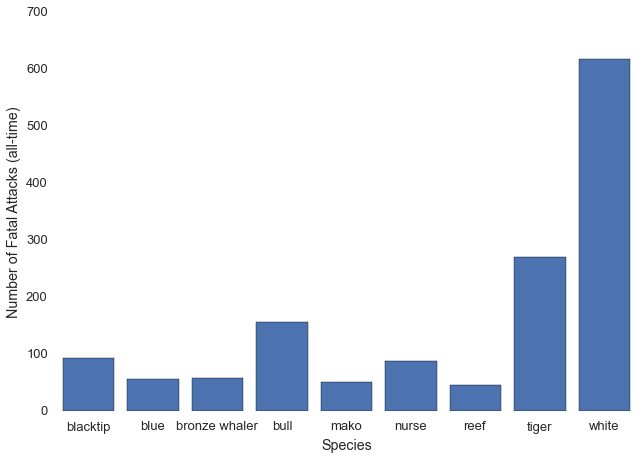

In [62]:
sb.set_context('talk')
plot_1 = sb.barplot(y='Fatal',x='Species_clean',data=dist1)
plot_1.set_xlabel('Species')
_= plot_1.set_ylabel('Number of Fatal Attacks (all-time)')

### How have the number of shark attacks changed from 1900 to today?

In [63]:
attacks_1900_pres = df[(df['year']>1899)]

AOT = attacks_1900_pres.groupby('year')[['Case Number']].count().reset_index()
AOT_FATAL = attacks_1900_pres.groupby('year')[['Fatal']].sum().reset_index()
AOT.columns = ['year','number of attacks']
# npAOT = np.array(AOT.reset_index())
AOT_merge = AOT.merge(AOT_FATAL, how='left')
AOT_merge.head()

,year,number of attacks,Fatal
0,1900,14,4
1,1901,9,3
2,1902,15,7
3,1903,11,9
4,1904,12,9


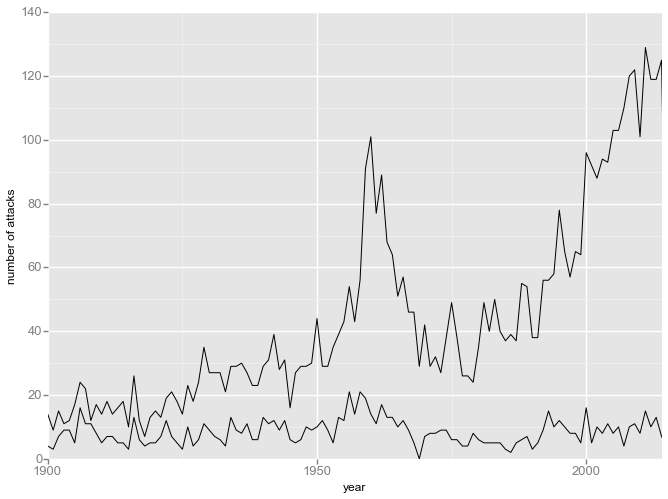

<ggplot: (-9223372036570990385)>

In [64]:
ggplot(aes(x='year',y='number of attacks',), data=AOT_merge) + geom_line()+ \
geom_line(aes(x='year',y='Fatal'),data=AOT_merge) + xlim(1900,2014) + scale_colour_gradient(low="white", mid="blue")

### In what countries are attacks most frequent?

In [65]:
# activity_hist = df.groupby('Activity')[['Case Number']].count().sort('Case Number',ascending=False)[:20].reset_index()
# activity_hist.columns

In [71]:
attacks_1900_pres.head()
country = attacks_1900_pres.groupby('Country')[['Case Number']].count().sort('Case Number', ascending=False).reset_index()

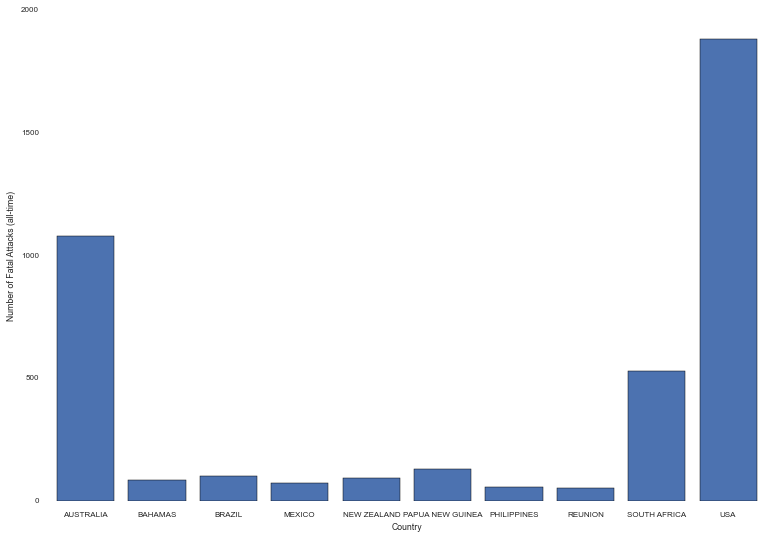

In [72]:
sb.set_context('poster',font_scale=.5)
plot4d = country[:10]
plot4 = sb.barplot('Country','Case Number',data=plot4d)
_ = plot4.set_ylabel('Number of Fatal Attacks (all-time)')
# plot4.set_xticklabels(plot4d['Country'], rotation=-90)

In [73]:
top_activities = []
attacks_1900_pres['Activity'].count()

4697

In [74]:
attacks_1900_pres.groupby(['year','Activity']).count()[500:800]


Case Number  \
year Activity                                                                                                                                                                                                                                                        
1941 seine netting                                                                                                                                                                                                                                               1   
     slipped off rocks and fell into the water                                                                                                                                                                                                                   1   
     ss ethel skakel foundered in central america hurricane of 1941                                                                                                                                                                                              1   
     standing                                                                                                                                                                                                                                                    2   
     standing, washing rear wheels of his ambulance in ankledeep water                                                                                                                                                                                           1   
     swimming                                                                                                                                                                                                                                                    3   
     swimming at edge of channel                                                                                                                                                                                                                                 1   
     the troopship britannia was sunk by the german raider thor                                                                                                                                                                                                  1   
     torpedoed & burning british  light cruiser with a crew of 450 men                                                                                                                                                                                           1   
1942 a 210ton brig was sunk by a japanese submarine. some of the survivors were machinegunned & some were taken by sharks                                                                                                                                        1   
     adrift on life raft                                                                                                                                                                                                                                         1   
     antiaircraft cruiser uss atlanta (cl,05) travelling in convoy after the battle of midway, encountered a japanese flotilla  (battle of guadalcanal) &, heavily damaged by gunfire, she was lost off lunga point. victim was swimming when bitten.            1   
     boat capsized during filming                                                                                                                                                                                                                                1   
     captured allied soldiers were squeezed into 3' bamboo pig baskets & fed to waiting sharks                                                                                                                                                                   1   
     days before the surrender of singapore, the 3 men 

In [35]:
x = [1,2,3,4,5]
'a' in x

False

In [44]:
df.groupby('Country')[['Case Number']].count().sort('Case Number',ascending=False)

,Case Number
Country,
USA,1983
AUSTRALIA,1216
SOUTH AFRICA,551
PAPUA NEW GUINEA,130
NEW ZEALAND,121
BRAZIL,101
BAHAMAS,90
MEXICO,78
FIJI,60
